In [1]:
import qubit
reload(qubit)
import cpwtools
reload(cpwtools)
inductiveCoupling = __import__("Transmission Lines.inductiveCoupling")
import capacitance as cap
import numpy as np
from scipy.constants import mu_0, epsilon_0, pi, hbar, e, c
from scipy.constants import physical_constants
from scipy.optimize import fsolve, root

%matplotlib inline

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

The inductance per unit length is 2.33e-08 H/m


In [2]:
q = qubit.Qubit('Qubit')
q.omega_q = 2*pi*5e9
q.C_g = 2.94e-15
q.C_q = 48.5e-15

In [6]:
C_q_list = range(40,50)+[55,60,65,70,100]
q_disp_list = []
alpha_list = []
print '(all in MHz)'
print '{:>7}  {:>7}  {:>17}  {:>7}  {:>7}  {:>7}'.format('C_sigma', 'Ej/Ec', 'charge dispersion', 'alpha', 'Ec', 'Ej')
for c in C_q_list:
    q.C_q = c*1e-15
    q_disp = q.charge_dispersion()/2/pi/hbar/1e6
    alpha = q.alpha(q.E_c(),q.E_j())/2/pi/1e6
    q_disp_list.append( q_disp )
    alpha_list.append(alpha)
    print '{:>7}  {:>7.2f}  {:>17.6f}  {:>7.2f}  {:>7.2f}  {:>7.2f}'.format( 
        c+1*q.C_g*1e15, q.E_j()/q.E_c(), q_disp, alpha, -q.E_c()/hbar/2/pi/1e6, q.E_j()/hbar/2/pi/1e9)

(all in MHz)
C_sigma    Ej/Ec  charge dispersion    alpha       Ec       Ej
  42.94    18.54          11.266293  -689.80  -451.10     8.37
  43.94    19.34           9.039006  -655.37  -440.83     8.52
  44.94    20.14           7.246301  -624.55  -431.02     8.68
  45.94    20.97           5.804643  -596.89  -421.64     8.84
  46.94    21.81           4.646284  -572.02  -412.66     9.00
  47.94    22.66           3.716339  -549.58  -404.05     9.16
  48.94    23.53           2.970383  -529.27  -395.80     9.31
  49.94    24.42           2.372497  -510.81  -387.87     9.47
  50.94    25.33           1.893668  -493.97  -380.26     9.63
  51.94    26.25           1.510482  -478.54  -372.93     9.79
  57.94    32.12           0.384108  -407.29  -334.32    10.74
  62.94    37.48           0.120931  -365.39  -307.76    11.53
  67.94    43.25           0.037651  -332.49  -285.11    12.33
  72.94    49.43           0.011612  -305.51  -265.56    13.13
 102.94    95.30           0.000009  -206.

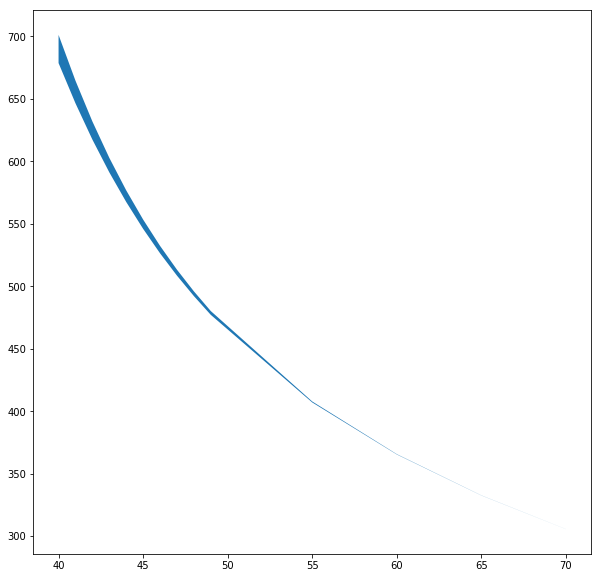

In [128]:
q_disp_list = np.array(q_disp_list)
alpha_list = np.array(alpha_list)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.fill_between(C_q_list, -alpha_list+q_disp_list, -alpha_list-q_disp_list)
#ax.set_yscale('log')
fig.set_size_inches(10,10)